# Import libraries

In [1]:
import pandas as pd
import sympy as sp
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import math
from math import sqrt
from math import comb
from sympy.interactive import printing
printing.init_printing(use_latex = True)
x = sp.Symbol('x')
from scipy.stats import norm
from scipy.stats import t

# Rename the columns and enter the values

In [3]:
df = pd.DataFrame({
    
    'Age':         [27,31,43,48,52,63],
    'Monthly wage':[42,47,45,51,61,59]

})

# Check dataframe

In [4]:
df

,Age,Monthly wage
0,27,42
1,31,47
2,43,45
3,48,51
4,52,61
5,63,59


# Find the mean and the standard derivation

In [5]:
df.describe()

,Age,Monthly wage
count,6.000000,6.000000
mean,44.000000,50.833333
std,13.416408,7.704977
min,27.000000,42.000000
25%,34.000000,45.500000
50%,45.500000,49.000000
75%,51.000000,57.000000
max,63.000000,61.000000


# Find the variance

In [6]:
df.var()

Age             180.000000
Monthly wage     59.366667
dtype: float64

# Find the covariance

In [7]:
df.cov()

,Age,Monthly wage
Age,180.0,88.600000
Monthly wage,88.6,59.366667


# Find the correlation coeficient and plot it

                   Age  Monthly wage
Age           1.000000      0.857089
Monthly wage  0.857089      1.000000


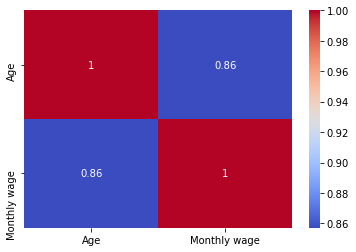

In [8]:
print(df.corr())

sn.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Find Z value for less/more or between.

# Z less than value:
P(Z < 1.67) = 1.67, Blue, Z-P = 0.9525

In [9]:
p = norm.cdf(1.67)
p

# Z bigger than value:
P(Z > 0.33) = 1 - (0.33, Blue, Z-P) = 0.3707

In [10]:
p = norm.pdf(0.33)
p

# Z between two values:
P(0.34 < Z < 1.34) =\
1.34, blue, Z-P = 0.9099\
0.34, blue, Z-P = 0.6331\
0.9099 - 0.6331 = 0.2768

In [11]:
norm.cdf(1.34) - norm.cdf(0.34)

---------------------------------

# Confidence interval - Normal distribution

Example:

In a survey of first year BI students the students were asked how many hours they studied each week.
The results were as follows:

........All students: µ = 11.0 hours, σ = 8.0 hours\
....Male students: µ = 10.6 hours, σ = 8.2 hours\
Female students: µ = 11.3 hours, σ = 7.9 hours

Suppose that the number of hours studied follows the Normal distribution.

# a)
The proportion of all students studying more than 15 hours a week is:

Let's use the formula:
# $z=\frac{\mu-x}{\sigma}$

In [12]:
# Enter value for µ
µ = 11.0

# Enter value for σ
σ = 8.0

# x = hours
x = 15

# The formula for z
z = ((µ - x)/σ)

# Z-score to P-value
p = norm.cdf(z)
p

# c)
The proportion of all students studying between 10 and 20 hours a week is:

In [13]:
# Enter value for µ
µ = 11.0

# Enter value for σ
σ = 8.0

# Enter hours
x = 20
y = 10

# The formula for z
z  =  ((x - µ)/σ)
zy =  ((y - µ)/σ)

# Z-score to P-value
p = norm.cdf(z) - norm.cdf(zy)
p

# d)
The proportion of all female students studying between 15 and 25 hours a week is:

In [14]:
# Enter value for µ
µ = 11.3

# Enter value for σ
σ = 7.9

# Enter hours
x = 25
y = 15

# The formula for z
z  =  ((x - µ)/σ)
zy =  ((y - µ)/σ)

# Z-score to P-value
p = norm.cdf(z) - norm.cdf(zy)
p

# e)
Ruth wants to be amongst the 15% of all females who study the most. How many hours a week
must she study to achieve this?

Female students: µ = 11.3 hours, σ = 7.9 hours

In [15]:
µ = 11.3
σ = 7.9
a = 1 - 0.15

z = norm.ppf(a)

x = µ + (σ * z)

print(f'She needs to study {x} hours to be top 15%')

She needs to study 19.48782377700094 hours to be top 15%


# f)
You meet a group of nine male students on their way to a Statistics class. What is the probability
that the average number of hours a week studied by the group is more than 11 hours?

#  $z=\frac{\mu-\bar{x}}{\sigma_{\bar{x}}}$

In [16]:
# P(x̅ > 11)
# Convert x̅ to z-value
# Male students: µ = 10.6 hours, σ = 8.2 hours

n = 9
x = 11
µ = 10.6
σ = 8.2

a = σ/sqrt(n)
z = (µ - x)/a

print(z)
print(norm.cdf(z))

-0.1463414634146343
0.44182591755031747


1 - 0.1463, blue, Z-P = 0.4418

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Confidence interval and the Margin of error for 90%,95% and 99%

$C I=\hat{p} \pm Z^{*} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$

Use calculator to find Zα

90% = (1 - (0.10/2)) = 0.95,  blue, INV, Z-P = 1.645\
95% = (1 - (0.05/2)) = 0.975, blue, INV, Z-P = 1.96\
99% = (1 - (0.01/2)) = 0.995, blue, INV, Z-P = 2.5758

In [17]:
n = 11
x = 0.93818
α = (1 - (0.05/2))

p = x/n
Zα = norm.ppf(α)
CI = Zα*math.sqrt((p*(1-p)/n))

print(f'Confidence level:    {p}')
print(f'Margin Error of 95%: {CI}')
print()
print(f'Confidence level range from {p-CI} to {p+CI}')

Confidence level:    0.08528909090909091
Margin Error of 95%: 0.1650594601728198

Confidence level range from -0.0797703692637289 to 0.25034855108191073


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Confidence interval MEAN and the Margin of error.


Example:
    A company records 30 deliveries, record delivery time for each. Calculate at 95% level
        
        x̅ = 9.2 days
        s = 3.7 days
        n = 30

t = Calculator: df, BLUE, INVERT, (df,t-P), 0.975, = 2.0452

# $CI=\bar{x} \pm t_{\alpha / 2} \cdot \frac{s}{\sqrt{n}}$

In [18]:
α = 1 - (0.05/2)
x̅ = 9.2
s = 3.7
n = 30

df = n-1
c = t.ppf(α, df)
a = (c*(s/math.sqrt(n)))

print(f'Confidence level:    {x̅}')
print(f'Margin Error:        {a}')
print()
print(f'Confidence level range from {x̅-a} to {x̅+a}')

Confidence level:    9.2
Margin Error:        1.3816027060049696

Confidence level range from 7.81839729399503 to 10.581602706004968


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Another example of confidence interval MEAN and the Margin of error.

Parking fees in parking house at Skedsmo Senter.
Recordings on 44 randomly chosen days.

Daily earnings:\
x̅ = 1260\
s = 150

a) Calculate a 90% CI for mean daily earnings. Can we conclude that average daily earnigns are over 1200kr?
    
    We know that
    n = 44
    x̅ = 1260
    s = 150

In [19]:
α = 1 - (0.10/2)
x̅ = 1260
s = 150
n = 44

df = n-1
µ = t.ppf(α, df)
a = (µ*(s/math.sqrt(n)))

print(f'Confidence level:    {x̅}')
print(f'Margin Error:        {a}')
print()
print(f'Confidence level range from {x̅-a} to {x̅+a}')

Confidence level:    1260
Margin Error:        38.01464157333029

Confidence level range from 1221.9853584266698 to 1298.0146415733302


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Hypothesis tests

# Example:

Hypothesis test for one proportion [Z-test].
In 2019 - 18% of population smoked.
In 2020 - a survey showed that 145 of 970 smoked. 145/970 = 15%

Test at the 5% level whether the proportion of smokers has decreased.

# $z=\frac{\hat{p}-p_{0}}{\sqrt{\frac{p_{0}\left(1-p_{0}\right)}{n}}}$

In [20]:
# Use calculator to find Zα
# α , Blue, Inv, Z-P
Zα = -1.645

In [21]:
# Insert the numbers, H0, α, and calculate tα using your calculator!

H0 = 0.18
p0 = 0.18
α = 0.05
n = 970
p̂ = 0.15

z = (p̂ - p0)/sqrt((p0*(1-p0))/n)

Zα = norm.ppf(α)

print(f'z = {z}')
print(f'Zα = {Zα}')
print('')

if z < Zα:
    print('z is less than Zα - we reject H0 and accept HA.')
    print(f'We are more than {1-α} % sure that the probability of smokers has decreased')
else:
    print('z is more than Za - we keep H0 and reject HA.')
    print(f'We are more than {1-α} % sure that the probability of smokers has increased')
    

z = -2.4320020860068072
Zα = -1.6448536269514729

z is less than Zα - we reject H0 and accept HA.
We are more than 0.95 % sure that the probability of smokers has decreased


# Example 2

Bottles of a certain medicine are supposed to contain 9.0 grams of medicine. A sample of 8 bottles were weighted. Results were:

9.2, 8.7, 8.9, 8.6, 8.8, 8.7, 9.0, 8.5

Can we include, at a 1% level that the bottling function needs adjustment?

# $ t =\frac{\left(\bar{x}-\mu_{0}\right) \sqrt{n}}{S} $

In [22]:
# Calculate tα on your calcualtor:
# tα = df , Blue, Inv, dt/t-p, α = 
tα = -2.998

In [23]:
# Insert the numbers, H0, α, and calculate tα using your calculator!

medicine = pd.Series([9.2, 8.7, 8.9, 8.6, 8.8, 8.7, 9.0, 8.5])
H0 = 9
α = 0.01
n = len(medicine)
df = n-1
x̅ = medicine.mean()
s = medicine.std()

tα = t.ppf(α, df)

tt = ((x̅ - H0)*sqrt(n))/s

print(f't = {tt}')
print(f'tα = {tα}')

if tt > tα:
    print('t is not in the rejection area. Therefor we keep H0')
else:
    print('t is in the rejection area. Therefor we keep HA')
        

t = -2.4944382578492856
tα = -2.9979515668685286
t is not in the rejection area. Therefor we keep H0


# Example 3

Average score test (over time) for a math test is 56.3%. 45 students attend an extended tutorial session just before the test. Their results:

x̅ = 62.7%\
s = 7.2%

Can we conclude, at the 5% level, that their score was above average?

# $ t = \frac{\left(\bar{x}-\mu_{0}\right) \sqrt{n}}{S} $

In [24]:
# Calculate tα on your calcualtor:
# tα = df , Blue, Inv, df/t-p, 0.95
tα = 1.6802

In [25]:
tα = t.ppf(α, df)
tα

In [26]:
# Write down everything we know.
# Question is about the averge (mean)! We need to calculate using the confidence interval MEAN.

H0 = 56.3
n = 45
x̅ = 62.7
s = 7.2
α = 0.95
df = n-1

tα = t.ppf(α, df)

tt = ((x̅ - H0)*sqrt(n))/s

print(f't = {tt}')
print(f'tα = {tα}')

if tt < tα:
    print('t is not in the rejection area. Therefor we keep H0')
else:
    print('t is in the rejection area. Therefor we keep HA')

t = 5.962847939999445
tα = 1.6802299753652514
t is in the rejection area. Therefor we keep HA


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Bionomial distribution

Example:
John sells subscriptions for a local newspaper by phoning potential customers. His experience is that
20% of the people he calls buy a subscription. One evening he phones 10 potential customers. He is
paid 500 kr for each subscription he sells.

a) The probability that he sells exactly three subscriptions is:

$P(X)={ }_{n} C_{x} p^{x}(1-p)^{n-x}$

In [27]:
# n = no of trials
# x = no of successes
# p = probability of success

n = 10
x = 3
p = 0.2

print('The probability is: ')
print(comb(n,x)*p**x*(1-p)**(n-x))

The probability is: 
0.2013265920000001


b) The probability that he sells at least one subscription is:

In [28]:
# n = no of trials
# x = no of successes
# p = probability of success

n = 10
x = 1
p = 0.2

print('The probability is: ')
print(comb(n,x)*p**x*(1-p)**(n-x))

The probability is: 
0.2684354560000001


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Comparing groups

1. Z-test for two proportions.


Example:
Z-test for two proportions.

Random sample for 1000 adults.
Gender and smoking habits.


Problem:
Is the proportion of female smokers larger than the male?

In [29]:
smokers = {    
    'Gender':['F', 'M'],
    'Smoker':[82,64],
    'Non-smoker':[428, 426]
}

df = pd.DataFrame(smokers)

df.set_index('Gender', inplace=True)

In [30]:
df

,Smoker,Non-smoker
Gender,,
F,82,428
M,64,426


Is the proportion of female smokers larger than the male?

We use this formula:


$z=\frac{\hat{p}_{1}-\hat{\rho}_{2}}{\sqrt{\frac{p(1-p)}{n_{1}}+\frac{\rho(1-\rho)}{n_{2}}}}$

H0 = p̂f = p̂m\
HA = p̂f != p̂f, p̂f > p̂f, p̂f < p̂f

Suppose we test at a 5% level (x̅ = 0.05)

In [31]:
# fs = female smokers
# ms = male smokers
# f = females
# m = males 

fs = df.iloc[0,0]
fm = df.iloc[1,0]

f = df.iloc[0,1] + df.iloc[0,0]
m = df.iloc[1,1] + df.iloc[1,0]

p̂f = fs/f
p̂m = fm/m

p = (fs + fm)/(f + m)

# α = 0.05

# Calculate critical value on your calcualtor:
# Zα = 0.95 , Blue, Inv, Z-P
Zα = norm.ppf(0.95)

z = (p̂f - p̂m)/sqrt(
    (p*(1-p))/f + (p*(1-p))/m
)

print(f'Zα = {Zα}')
print(f'z is {z}')
print()

if Zα > z:
    print('z is not in the rejection area - therefor we keep H0.')
else:
    print('z is in the rejection area - there for we keep HA.')

Zα = 1.6448536269514722
z is 1.350774503625625

z is not in the rejection area - therefor we keep H0.


------------

Problem 2

A survey asked randomly selected subjects if they agreed with the statement "It is morally wrong for married people to have an affair". The results of the survey are presented in the table below.

In [32]:
# Remember to add the lowest numbers firsts! So the number of disagree is bigger than agree.

people = {    
    'Gender':['F', 'M'],
    'Disagree':[40, 58],
    'Agree':[351,357],
}

df = pd.DataFrame(people)

df.set_index('Gender', inplace=True)

In [33]:
df

,Disagree,Agree
Gender,,
F,40,351
M,58,357


A) test the claim that there is a difference in attitude between the males and the females at a 10% level.

In [34]:
# Because they are asking for a DIFFERENCE, we need to use α/2 and not just α.

In [35]:
fs = df.iloc[0,0]
fm = df.iloc[1,0]

f = df.iloc[0,1] + df.iloc[0,0]
m = df.iloc[1,1] + df.iloc[1,0]

p̂f = fs/f
p̂m = fm/m

p = (fs + fm)/(f + m)

# α =   0.10
# α/2 = 0.05

# Calculate critical value on your calcualtor:
# Zα = 0.05 , Blue, Inv, Z-P
Zα = norm.ppf(0.05)

z = (p̂f - p̂m)/sqrt(
    (p*(1-p))/f + (p*(1-p))/m
)

print(f'Zα = {Zα}')
print(f'z is {z}')
print()

if Zα < z:
    print('z is not in the rejection area - therefor we keep H0. We connot conclude that...')
else:
    print('z is in the rejection area - there for we keep HA.')

Zα = -1.6448536269514729
z is -1.6262455564329228

z is not in the rejection area - therefor we keep H0. We connot conclude that...


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# T-test for paired samples

Statistics - t-test for paired samples
We want to test whether demand is affected by where products are phced on shelves in supermarkets. 26 sinibr supermarkets were paired giving 13 pairs of simibr supermarkets in each pair. Comflakes boxes were pheed at eye-kvel in one supermarket and either above of bebw eye-kvel in the other. The saks were recorded for all supermarkets in the same week. Test at 5% level. The results are shown bebw:

$$
\begin{array}{|l|r|r|r|r|r|r|r|r|r|r|r|r|r|}
\hline \text { Eye-kvel } & 111 & 150 & 130 & 154 & 67 & 112 & 84 & 123 & 71 & 62 & 38 & 51 & 77 \\
\hline \text { Other } & 71 & 121 & 133 & 126 & 93 & 49 & 109 & 96 & 27 & 58 & 36 & 37 & 69 \\
\hline \text { Difference } & & & & & & & & & & & & & \\
\hline
\end{array}
$$

$
\begin{array}{l}
\text { Hypothesis test: } \\
H_{0}: \mu_{1}=\mu_{2} \\
       H_{n}: \mu_{1}>\mu_{2}
\end{array}
$

-------------

Critical value = $d f=n_{1}+n_{2}-2$


Test Statistics =  $t=\frac{\bar{x}_{1}-\bar{x}_{2}}{S(\hat{\delta})}$

$
\begin{array}{l}
\text { 1. Calculate the differences } \\
\text { 2. New sample of clifterences } \\
\text { 3. Calculake } \bar{d} \text { and } s(d)
\end{array}
$

In [36]:
df = pd.DataFrame({
    
    'Eye-kvel':    [111,150,130,154,67,112,84,123,71,62,38,51,77],
    'Other':       [71,121,133,126,93,49,109,96,27,58,36, 37, 69],
    'Difference':  [40,29, -3, 28,-26, 63,-25,27, 44,4, 2, 14, 8]

})

In [37]:
df.describe()

,Eye-kvel,Other,Difference
count,13.000000,13.000000,13.000000
mean,94.615385,78.846154,15.769231
std,37.790075,36.623868,26.166626
min,38.000000,27.000000,-26.000000
25%,67.000000,49.000000,2.000000
50%,84.000000,71.000000,14.000000
75%,123.000000,109.000000,29.000000
max,154.000000,133.000000,63.000000


In [38]:
d_mean = 15.769231
s_std  = 26.166626

In [39]:
H0 = 0
n = 13
x̅ = d_mean
s = s_std
α = 0.95
df = n-1

tα = t.ppf(α, df)

tt = ((x̅ - H0)*sqrt(n))/s

p_value = 1 - (t.cdf(tt, df))

print(f't = {tt}')
print(f'tα = {tα}')
print(f'The p-value is {p_value}')
print()

if tt < tα:
    print('t is not in the rejection area. Therefor we keep H0')
else:
    print('t is in the rejection area. Therefor we keep HA')

t = 2.17287360415272
tα = 1.782287555649159
The p-value is 0.025267198587794804

t is in the rejection area. Therefor we keep HA


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Statistics - Practice Problem - Paired sample

A company QuickSlim runs a weight reduction programme. To determine the effect of their programme they decided to test 10 randomly participants. They were weighed before and after the programme, and the results are shown in the table below. All weights in $\mathrm{kg}$.

\begin{array}{|r|r|r|}
\hline & {\text { Before }} & {\text { After }} \\
\hline \mathbf{1} & 88 & 84 \\
\hline 2 & 93 & 94 \\
\hline 3 & 68 & 63 \\
\hline 4 & 103 & 100 \\
\hline 5 & 126 & 115 \\
\hline 6 & 92 & 88 \\
\hline 7 & 78 & 80 \\
\hline 8 & 89 & 86 \\
\hline 9 & 83 & 80 \\
\hline 10 & 110 & 105 \\
\hline
\end{array}

QuickSlim claims that the programme has a weight reduction effect. Test this claim at the $1 \%$ level.

1) Calculate the difference

2) Calculate the d_mean, d_std

3) Find tα

4) Calculate t

5) Conclude

In [40]:
df = pd.DataFrame({
    
    'Before':      [88, 93,68,103,126,92,78,89,83,110],
    'After':       [84, 94,63,100,115,88,80,86,80,105],
    'Difference':  [4, -1, 5, 3,  11, 4, -2, 3, 3, 5 ]

})

In [41]:
df.describe()

,Before,After,Difference
count,10.000000,10.000000,10.000000
mean,93.000000,89.500000,3.500000
std,16.566365,14.713939,3.535534
min,68.000000,63.000000,-2.000000
25%,84.250000,81.000000,3.000000
50%,90.500000,87.000000,3.500000
75%,100.500000,98.500000,4.750000
max,126.000000,115.000000,11.000000


In [42]:
d_mean = 3.5
s_std  = 3.535534

In [43]:
H0 = 0
n = 10
x̅ = d_mean
s = s_std
α = 0.99
df = n-1

tα = t.ppf(α, df)

tt = ((x̅ - H0)*sqrt(n))/s

p_value = 1 - (t.cdf(tt, df))

print(f't = {tt}')
print(f'tα = {tα}')
print(f'The p-value is {p_value}')
print()

if tt < tα:
    print('t is not in the rejection area. Therefor we keep H0')
else:
    print('t is in the rejection area. Therefor we keep HA')

t = 3.130495085209003
tα = 2.8214379233005493
The p-value is 0.006056018051913359

t is in the rejection area. Therefor we keep HA


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# T-test for two groups

A class of 3td year BI students make up our students.
78 female students with an average age of x̅f = 24.3 years.
103 male students with an average age of x̅m = 27.8 years.

Can we conclude, at the 5% level that the average age of male are higher?

-------------

$H_{0}: \mu_{1}=\mu_{2}$

$\begin{array}{lll}H_{A}: \mu_{1} \neq \mu_{2} ,& \mu_{1}>\mu_{2} ,& \mu_{1}<\mu_{2}\end{array}$

-------------

Critical value = $d f=n_{1}+n_{2}-2$


Test Statistics =  $t=\frac{\bar{x}_{1}-\bar{x}_{2}}{S(\hat{\delta})}$

In [44]:
tα = t.ppf(α, df)
tα

In [45]:
f = 78
x̅f = 24.3
m = 103
x̅m = 27.8

𝑆𝛿̂ = 1.46

# -2 is constant
df = m + f - 2

# α = 0.05
# We need to find tα using Calc: (f+m), Blue, INV, df, 0.95
tα = 1.6534

t = (x̅m - x̅f)/𝑆𝛿̂

print(f'tα is {tα}')
print(f't is {t}')
print()

if t > tα:
    print('t is in the rejection area - we reject H0 and keep HA.\
    The male students are indeed older than the females.')
else:
    print('t is not in the rejection area - we keep H0.\
    The male students are not older than the females.')

tα is 1.6534
t is 2.397260273972603

t is in the rejection area - we reject H0 and keep HA.    The male students are indeed older than the females.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Exam Question:

In a $10 \mathrm{~km}$ street race in New York the Age and finishing time were recorded. You would like to determine whether participants in their early twenties run faster than those in their late twenties. To test this you draw two random samples. The first sample consists of 10 participants from the age group $20-23$ years and the second consists of 11 participants from the age group $26-29$ years. Let the variable $X$ be the finishing time for the younger group, and $Y$ be the finishing time for the older group. The finishing times are shown in the table below:

$
\begin{array}{ll}
X & Y \\
48 & 59 \\
40 & 44 \\
67 & 54 \\
51 & 46 \\
39 & 53 \\
55 & 59 \\
42 & 48 \\
46 & 61 \\
50 & 50 \\
52 & 55 \\
& 43
\end{array}
$

# a)

Calculate the sample average for both samples. What do the samples suggest?

In [46]:
speedtime_of_20to23 = np.array([48,40,67,51,39,55,42,46,50,52])
speedtime_of_26_29 = np.array([59,44,54,46,53,59,48,61,50,55,43])

print('The speedtime of 20 to 23: ')
print(np.mean(speedtime_of_20to23))
print('The speedtime of 26 to 29: ')
print(np.mean(speedtime_of_26_29))
print()
print('Conclution: The younger group runs faster')

The speedtime of 20 to 23: 
49.0
The speedtime of 26 to 29: 
52.0

Conclution: The younger group runs faster


# b)

Use a t-test for two independent samples to test at the $5 \%$ level whether participants in the age group $20-23$ years run faster than the participants in the age group $26-29$ years. $S[\hat{\delta}]=3.18$.

In [47]:
x̅y = 49.0
x̅o = 52.0

y = 10
o = 11
𝑆𝛿̂ = 3.18

# -2 is constant
df = o + y - 2

# α = 0.05
# We need to find tα using Calc: (df), Blue, INV, df, 0.05
tα = -1.7291

t = (x̅y - x̅o)/𝑆𝛿̂

print(f'tα is {tα}')
print(f't is {t}')
print()

if t < tα:
    print('t is in the rejection area - we reject H0 and keep HA.')
else:
    print('t is not in the rejection area - we keep H0.')

tα is -1.7291
t is -0.9433962264150942

t is not in the rejection area - we keep H0.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Chi square tests

Test for homogeneity

$$
\begin{aligned}
&\text { How Bl-students travel to campus: }\\
&\begin{array}{|l|r|r|r|r|}
\hline \begin{array}{c}
\text { O } \\
\text { (Observed) }
\end{array} & \begin{array}{c}
\text { Public } \\
\text { transport }
\end{array} & \text { Walk } & \text { Other } & \text { Total } \\
\hline \text { Female } & 58 & 25 & 17 & 100 \\
\hline \text { Male } & 60 & 9 & 11 & 80 \\
\hline \text { Total } & 118 & 34 & 28 & 180 \\
\hline
\end{array}
\end{aligned}
$$

In [48]:
ffp = 58
fmp = 60
ftp = 118

ffw = 25
fmw = 9
fwt = 34

ffo = 17
fmo = 11
fto = 28

fft = 100
fmt = 80
ftt = 180

table1 = pd.DataFrame({
    
    'Expected':    ['Female', 'Male', 'Total'],
    'Public transport':    [ffp, fmp, ftp],
    'Walk':                [ffw, fmw, fwt],
    'Other':               [ffo, fmo, fto],
    'Total':               [fft, fmt, ftt],

})

table1

,Expected,Public transport,Walk,Other,Total
0,Female,58,25,17,100
1,Male,60,9,11,80
2,Total,118,34,28,180


$
\text { Ho: Mode of transport is independent of gender. }
$

$
\text { HA: Mode of transport is gender dependent. }
$


$$
\text { What we would expect if the distribution was homogen. }
$$

$$
\begin{array}{|l|c|c|c|c|}
\hline \begin{array}{l}
\text { E } \\
\text { (Expected) }
\end{array} & \begin{array}{l}
\text { Public } \\
\text { transport }
\end{array} & \text { Walk } & \text { Other } & \text { Total } \\
\hline \text { Female } & & & & 100 \\
\hline \text { Male } & & & & 80 \\
\hline \text { Total } & 118 & 34 & 28 & 180 \\
\hline
\end{array}
$$

In [49]:
tp = 118
tw = 34
to = 28

tf = 100
tm = 80
tt = 180

fp = (tf / tt) *tp
fw = (tf / tt) *tw
fo = (tf / tt) *to

mp = (tm / tt) *tp
mw = (tm / tt) *tw
mo = (tm / tt) *to

In [50]:
table2 = pd.DataFrame({
    
    'Expected':    ['Female', 'Male', 'Total'],
    'Public transport':    [fp, mp, tp],
    'Walk':                [fw, mw, tw],
    'Other':               [fo, mo, to],
    'Total':               [tf, tm, tt],

})

table2

,Expected,Public transport,Walk,Other,Total
0,Female,65.555556,18.888889,15.555556,100
1,Male,52.444444,15.111111,12.444444,80
2,Total,118.000000,34.000000,28.000000,180


$
\begin{array}{c}
\text { Test statistic } x^{2} \\
x^{2}=\sum \frac{(0-E)^{2}}{E}
\end{array}
$

In [51]:
print(ffw)
print(fw)

25
18.88888888888889


In [52]:
# See homogeneity table

chi = pd.DataFrame({
    
    'E':    ['Female', 'Male'],
    'Public_transport':    [((ffp-fp)**2)/fp,((fmp-mp)**2)/mp],
    'Walk':                [((ffw-fw)**2)/fw,((fmw-mw)**2)/mw],
    'Other':               [((ffo-fo)**2)/fo,((fmo-mo)**2)/mo],

})

chi

,E,Public_transport,Walk,Other
0,Female,0.870810,1.977124,0.134127
1,Male,1.088512,2.471405,0.167659


In [53]:
# test_statistics = 𝑥2𝑥
test_statistics = chi.Public_transport.sum() + chi.Walk.sum() + chi.Other.sum()
test_statistics

Critical value : df = (r-1)(c-1)

r = # of rows
c = # of columns

So in this case:
df = (2-1)(3-1) = 2

find
$x_{\alpha}^{2}$

https://www.coursehero.com/file/69265647/Chi-square-table-2pdf/

$x^{2}=6.7 \quad$ and $\quad x_{x}^{2}=5.991$


$x^{2}>x_{α}^{2} \Rightarrow$ we reject $H_{0}$ and accept $H_{n} .$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Example (Spring 2014$)$
The table below shows the number of boats of different types that were advertised on Finn.no a certain month for the counties of $\emptyset$ stfold and Vestfold:

$$
\begin{array}{|l|c|c|c|c|}
\hline & \text { Cabin eruiser } & \text { Day eruiser } & \text { Yacht } & \text { Total } \\
\hline \text { Ostfold } & 85 & 110 & 45 & 240 \\
\hline \text { Vestfold } & 115 & 90 & 55 & 260 \\
\hline \text { Total } & 200 & 200 & 100 & 500 \\
\hline
\end{array}
$$

Use a Chi-square test for independence to test whether there is a relationship between type of boat and county. Test at the $5 \%$ level.

In [54]:
ffp = 85
fmp = 115
ftp = 200

ffw = 110
fmw = 90
fwt = 200

ffo = 45
fmo = 55
fto = 100

fft = 240
fmt = 260
ftt = 500

boats = pd.DataFrame({
    
    ' ':    ['Ostfold', 'Vestfold', 'Total'],
    'Cabin eruiser':    [ffp, fmp, ftp],
    'Day eruiser':      [ffw, fmw, fwt],
    'Yacht':            [ffo, fmo, fto],
    'Total':            [fft, fmt, ftt],

})

boats

,,Cabin eruiser,Day eruiser,Yacht,Total
0,Ostfold,85,110,45,240
1,Vestfold,115,90,55,260
2,Total,200,200,100,500


In [55]:
tp = 200
tw = 200
to = 100

tf = 240
tm = 260
tt = 500

fp = (tf / tt) *tp
fw = (tf / tt) *tw
fo = (tf / tt) *to

mp = (tm / tt) *tp
mw = (tm / tt) *tw
mo = (tm / tt) *to

Papir calculation:

$E=\frac{\text { row sum } x \text { columns sum }}{\text { total sum }}$

In [56]:
table2 = pd.DataFrame({
    
    '':    ['Ostfold', 'Vestfold', 'Total'],
    'Cabin eruiser':    [fp, mp, tp],
    'Day eruiser':      [fw, mw, tw],
    'Yacht':            [fo, mo, to],
    'Total':            [tf, tm, tt],

})

print('Expected value: ')

table2

Expected value: 


,,Cabin eruiser,Day eruiser,Yacht,Total
0,Ostfold,96.0,96.0,48.0,240
1,Vestfold,104.0,104.0,52.0,260
2,Total,200.0,200.0,100.0,500


$
\begin{array}{c}
\text { Test statistic } x^{2} \\
x^{2}=\sum \frac{(0-E)^{2}}{E}
\end{array}
$

In [57]:
# See homogeneity table



chi = pd.DataFrame({
    
    '':    ['Ostfold', 'Vestfold'],
    'Cabin_eruiser':     [((ffp-fp)**2)/fp,((fmp-mp)**2)/mp],
    'Day_eruiser':       [((ffw-fw)**2)/fw,((fmw-mw)**2)/mw],
    'Yacht':             [((ffo-fo)**2)/fo,((fmo-mo)**2)/mo],

})

chi

,,Cabin_eruiser,Day_eruiser,Yacht
0,Ostfold,1.260417,2.041667,0.187500
1,Vestfold,1.163462,1.884615,0.173077


In [58]:
df = (len(chi.index) - 1) * (len(chi.columns) - 2)
df

Find the critical value from this table!
Check the question about what the α is. In this case it's 0.05.

α = 0.05\
df = 2

https://www.statology.org/wp-content/uploads/2020/01/chi_square_table_small.jpg

critical value is 5.991 is this case!

In [59]:
critical_value = 5.991

In [60]:
# test_statistics = 𝑥2𝑥
test_statistics = chi.Cabin_eruiser.sum() + chi.Day_eruiser.sum() + chi.Yacht.sum()
print('test_statistics =')
test_statistics

test_statistics =


In [61]:
if critical_value < test_statistics:
    print('We reject HO, and accept HA. There is a relationsship between ...')
else:
    print('We keep H0. There is not a relationsship between ...')

We reject HO, and accept HA. There is a relationsship between ...


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)